# Data Engineering and Plotting

## Importing CSV data


In [2]:
using CSV
using DataFrames
data = CSV.read("HedgeFunds.csv", DataFrames.DataFrame)
first(data ,10)

Row,Row Labels,Days,HFRX Absolute Return Index,HFRX ED: Distressed Restructuring Index,HFRX ED: Merger Arbitrage Index,HFRX ED: Special Situations Index,HFRX EH: Equity Market Neutral Index,HFRX EH: Fundamental Growth Index,HFRX EH: Fundamental Value Index,HFRX Emerging Markets Composite Index,HFRX Equal Weighted Strategies CHF Index,HFRX Equal Weighted Strategies EUR Index
,String15,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,4/16/2012,0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
2,4/17/2012,1,100.137,99.9457,100.162,100.715,99.9251,100.208,100.313,99.9328,100.16,100.147
3,4/18/2012,2,100.213,99.9879,100.188,100.865,100.059,100.543,100.344,100.086,100.197,100.191
4,4/19/2012,3,100.38,100.015,100.152,100.705,99.8179,100.493,100.49,100.099,100.14,100.128
5,4/20/2012,4,100.372,99.9849,100.214,100.806,99.7773,100.641,100.425,100.279,100.176,100.167
6,4/23/2012,7,100.394,99.9286,100.045,100.343,99.6617,100.107,100.177,100.251,100.029,100.019
7,4/24/2012,8,100.233,99.9185,99.9993,100.358,99.7013,100.014,100.183,100.123,100.048,100.043
8,4/25/2012,9,100.248,99.8642,100.138,100.677,99.7825,100.56,100.215,100.079,100.192,100.184
9,4/26/2012,10,100.024,99.8893,99.9111,100.785,99.3152,100.523,100.481,99.86,100.178,100.175


In [8]:
using DelimitedFiles
hedgeFundValues = readdlm("HedgeFunds.csv", ',')  
hedgeFundValues
# typeof(hedgeFundValues)
# for i in 1:10
#  println(hedgeFundValues[i,3])
# end

1009×12 Matrix{Any}:
 "\ufeffRow Labels"  …     "HFRX Equal Weighted Strategies EUR Index"
 "4/16/2012"            100.0
 "4/17/2012"            100.147
 "4/18/2012"            100.191
 "4/19/2012"            100.128
 "4/20/2012"         …  100.167
 "4/23/2012"            100.019
 "4/24/2012"            100.043
 "4/25/2012"            100.184
 "4/26/2012"            100.175
 ⋮                   ⋱  
 "4/4/2016"          …  100.823
 "4/5/2016"             100.599
 "4/6/2016"             100.733
 "4/7/2016"             100.645
 "4/8/2016"             100.656
 "4/11/2016"         …  100.679
 "4/12/2016"            100.684
 "4/13/2016"            100.954
 "4/14/2016"            100.928

In [9]:
using Dates
Dates.DateTime("2 Oct 2021", "d u y")

2021-10-02T00:00:00

In [10]:
DateTime("2/10/2021", "dd/mm/yyyy")

2021-10-02T00:00:00

In [11]:
using Dates
Dates.DateTime(hedgeFundValues[2,1], "mm/dd/yyyy")

2012-04-16T00:00:00

In [12]:
rows, cols = size(hedgeFundValues)

(1009, 12)

In [13]:
col_time = hedgeFundValues[:, 1]
for i in 2:rows
  col_time[i]=Dates.DateTime(hedgeFundValues[i, 1], "mm/dd/yyyy")
end
first(col_time, 10)

10-element Vector{Any}:
 "\ufeffRow Labels"
 2012-04-16T00:00:00
 2012-04-17T00:00:00
 2012-04-18T00:00:00
 2012-04-19T00:00:00
 2012-04-20T00:00:00
 2012-04-23T00:00:00
 2012-04-24T00:00:00
 2012-04-25T00:00:00
 2012-04-26T00:00:00

In [14]:
col_timedays = hedgeFundValues[:, 1]
col_timerata = hedgeFundValues[:, 1]
for i = 2:rows
  col_timedays[i] = col_time[i]-col_time[2]
  col_timerata[i] = Dates.datetime2rata(col_time[i]) - Dates.datetime2rata(col_time[2])
end
first(col_timerata, 10)

10-element Vector{Any}:
   "\ufeffRow Labels"
  0
  1
  2
  3
  4
  7
  8
  9
 10

In [16]:
# using Pkg
# Pkg.add("Plots")
using Plots

In [ ]:
# Pkg.add("PyPlot")
pyplot()
# gr()

In [39]:
theme(:juno)

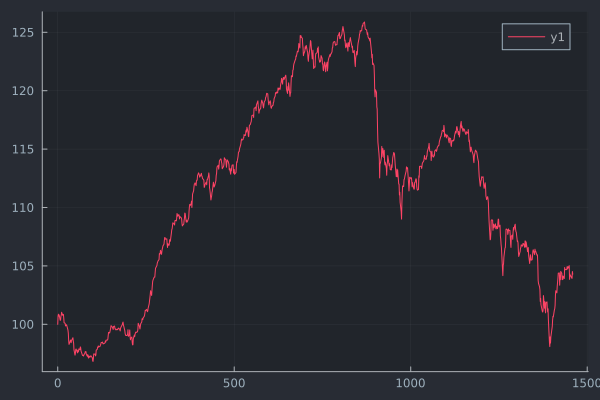

In [40]:
x = hedgeFundValues[2:end, 2]
y = hedgeFundValues[2:end, 6]
plot(x, y)
#plot(hedgeFundValues[2:end, 2], hedgeFundValues[2:end, 3])
#typeof(hedgeFundValues[2,2])
#typeof(hedgeFundValues[3,3])

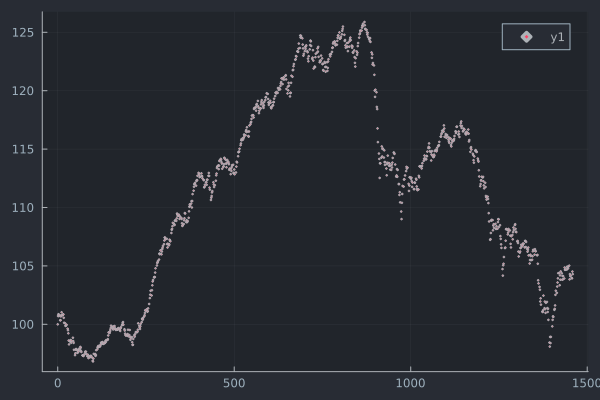

In [41]:
plot(x, y, linetype = :scatter, 
    marker = (:diamond, 1)) # linetype = :scatter # marker = (:circle, 2))

In [33]:
gr()

Plots.GRBackend()

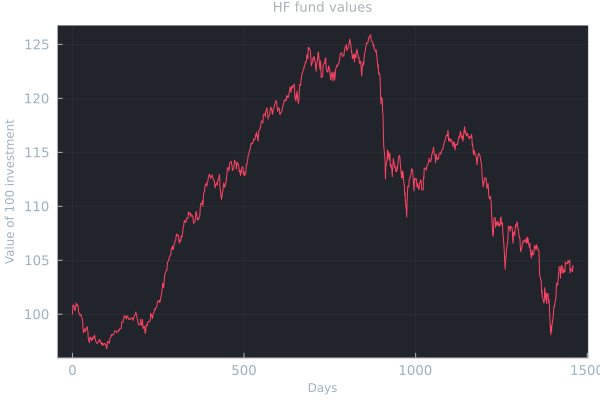

In [42]:
plot(x, y, title = "HF fund values", 
           titlefontsize = 9,
           xlabel = "Days",            
           xtickfontsize = 9,
           ytickfontsize = 9,
           xguidefontsize = 8,
           yguidefontsize = 8,
           ylabel    = "Value of 100 investment", 
           legend   = false, 
           grid = true,
           background= :transparent)  

In [43]:
savefig("thisFig.png")

"c:\\Users\\hamid\\OneDrive\\code\\JuPy\\Part01 Basics - Rafatnejad(1-5), Mousavizade(6-8)\\thisFig.png"

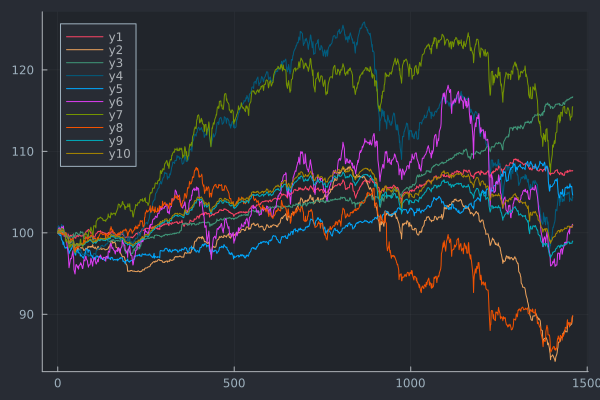

In [44]:
gr()
x = Array{Real}(hedgeFundValues[2:end, 2])
ys = Array{Real}(hedgeFundValues[2:end, 3:end])
plot(x, ys)

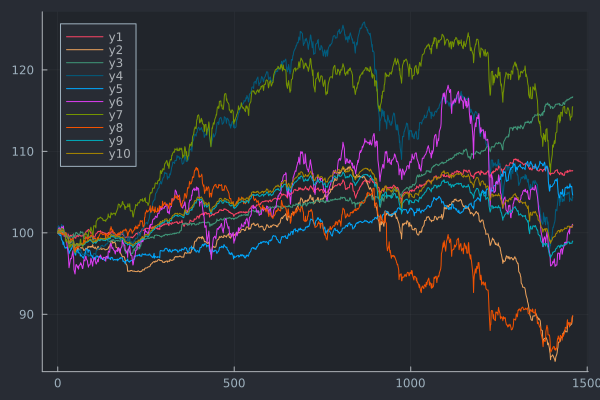

In [45]:
p = plot()
for col in eachcol(hedgeFundValues[2:end, 3:end]) # 3:cols # cols-2
  plot!(p, x, col)
end
display(p)

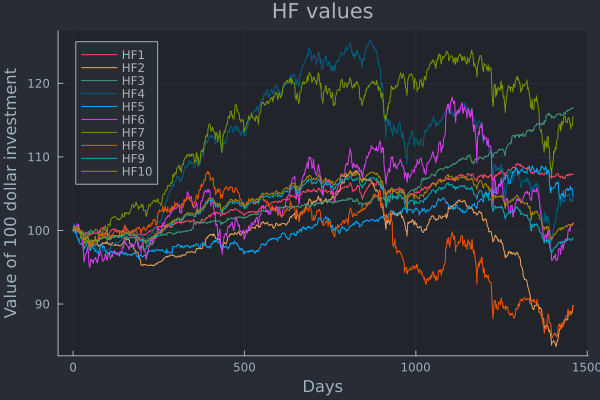

In [46]:
plot(x, ys,
      label     = ["HF1" "HF2" "HF3" "HF4" "HF5" "HF6" "HF7" "HF8" "HF9" "HF10"],
      title      = "HF values",
      xlabel   = "Days",
      ylabel   = "Value of 100 dollar investment",
      line = (:line))

## Alphavantage

In [54]:
# MyKey = "DT1N21YO61HVHXQT" #hamid.arian1729
# MyKey = "7ZCSY99XJ9QMLB66" #a1r7i2a9n
MyKey = "HCW8TQRE1NFAEJH7" #risklab.me
println("MyKey loaded successfully!")

MyKey loaded successfully!


.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.

In [ ]:
# using Pkg
# Pkg.add("AlphaVantage, "StatsPlots", "DataFrames")

In [48]:
# theme(:juno)

In [51]:
using AlphaVantage, Plots, StatsPlots

In [60]:
# client = AlphaVantage.GLOBAL[]
# client.key = MyKey
# println("Client key loaded...")
# export ALPHA_VANTAGE_API_KEY = MyKey
ENV["ALPHA_VANTAGE_API_KEY"] = MyKey

"HCW8TQRE1NFAEJH7"

In [89]:
using AlphaVantage
using DataFrames, Plots, Dates, JSON

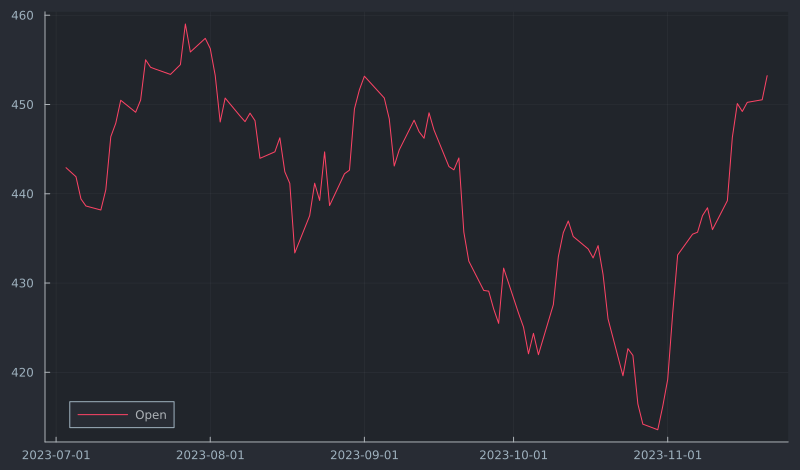

Row,Date,Open
,Date,Float64
1,2023-07-03,442.92
2,2023-07-05,441.91
3,2023-07-06,439.42
4,2023-07-07,438.63
5,2023-07-10,438.18


In [87]:
# Fetch the data (ensure you have the correct setup for AlphaVantage)
spy = time_series_daily("SPY")

# Access the 'Time Series (Daily)' part of the data
time_series_data = spy["Time Series (Daily)"]

# Convert the nested structure to a DataFrame
# The keys of the nested structure are the dates
data = DataFrame(Date=String[], Open=Float64[])
for (date, values) in time_series_data
    open_price = parse(Float64, values["1. open"])
    push!(data, (date, open_price))
end

# Sort the DataFrame by date
sort!(data, :Date)

# Convert the 'Date' column to Date type
data[!, :Date] = Date.(data[!, :Date], "yyyy-mm-dd")

# Plot the time series
pl1 = plot(data[!, :Date], data[!, :Open], label="Open")
display(pl1)

# Display the first few rows of the DataFrame
first(data, 5)


1000×11 DataFrame
  Row │ x1          x2       x3       x4       x5       x6       x7       x8   ⋯
      │ Any         Any      Any      Any      Any      Any      Any      Any  ⋯
──────┼─────────────────────────────────────────────────────────────────────────
    1 │ 2023-11-21  2021.41  2030.33  2017.57  2028.15  2021.41  2030.33  2017 ⋯
    2 │ 2023-11-20  2011.47  2066.4   1990.0   2021.4   2011.47  2066.4   1990
    3 │ 2023-11-19  1962.59  2015.75  1942.89  2011.47  1962.59  2015.75  1942
    4 │ 2023-11-18  1960.82  1971.22  1916.0   1962.6   1960.82  1971.22  1916
    5 │ 2023-11-17  1961.77  1991.5   1904.0   1960.82  1961.77  1991.5   1904 ⋯
    6 │ 2023-11-16  2058.49  2090.4   1939.1   1961.77  2058.49  2090.4   1939
    7 │ 2023-11-15  1979.4   2062.4   1967.01  2058.48  1979.4   2062.4   1967
    8 │ 2023-11-14  2053.65  2064.96  1936.6   1979.39  2053.65  2064.96  1936
  ⋮   │     ⋮          ⋮        ⋮        ⋮        ⋮        ⋮        ⋮        ⋮ ⋱
  994 │ 2021-03-03  14

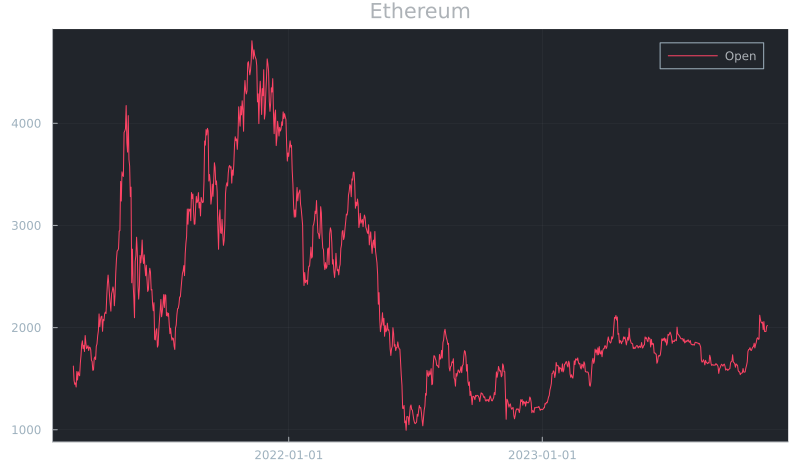

In [90]:
ethRaw = AlphaVantage.digital_currency_daily("ETH", "USD", datatype="csv")
eth = DataFrame(ethRaw[1], :auto)
show(eth);
eth = rename(eth, Symbol.(vcat(ethRaw[2]...)), makeunique=true)
eth.Date = Date.(eth.timestamp)
eth.Open = Float64.(eth[!, Symbol("open (USD)")])

plot(eth.Date, eth.Open, label="Open", title = "Ethereum", background = :transparent)

# Writing/Reading Files
The `do` syntax we saw earlier is helpful when using the `open()` function:


In [76]:
open("test.txt", "w") do f
    write(f, "This is a test.\n")
    write(f, "I repeat, this is a test.\n")
end

open("test.txt") do f
    for line in eachline(f)
        println("[$line]")
    end
end

[This is a test.]
[I repeat, this is a test.]


Alternatively, you can read the whole file into a string:

In [77]:
open("test.txt") do f
    s = read(f, String)
end

"This is a test.\nI repeat, this is a test.\n"

Or more concisely:

In [81]:
s = read("test.txt", String)

"This is a test.\nI repeat, this is a test.\n"